In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [166]:
def show_image(img, grey=True, title=""):
    plt.imshow(img, cmap='gray' if grey else None)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

## Task 1

In [ ]:
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])

eigenvalues, eigenvectors = np.linalg.eig(A)

eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

for i in range(len(eigenvalues)):
    print(f"Eigenvalue: {eigenvalues[i]}")
    eigenvector = eigenvectors[:, i]
    print(f"Eigenvector: {eigenvector}")
    print(f"Matrix * eigenvector: {A @ eigenvector}")
    print(f"Eigenvalue * eigenvector: {eigenvalues[i] * eigenvector}")
    print("")

## Task 2

In [ ]:
image_raw = imread("lynx.jpg")
print(image_raw.shape)

image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum / image_sum.max()
print(image_bw.max())

show_image(image_raw, False)
show_image(image_sum)
show_image(image_bw)

In [ ]:
X = image_bw - np.mean(image_bw, axis=0)

cov = np.cov(X, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

cov

In [161]:
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

def calc_k(percentage):
    return np.searchsorted(cumulative_variance, percentage) + 1

k95 = calc_k(0.95)

159


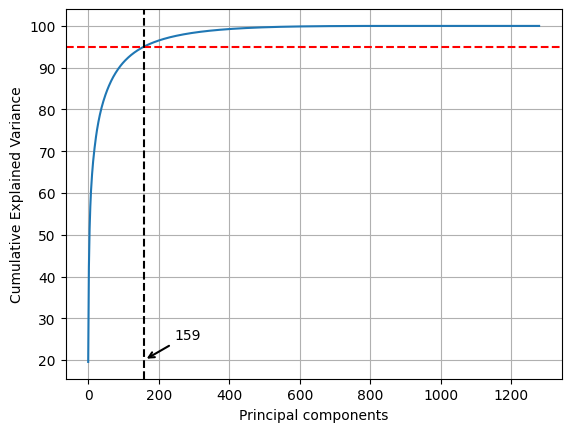

In [162]:
print(k95)

plt.plot(cumulative_variance * 100)
plt.xlabel("Principal components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)

plt.axhline(95, color='r', linestyle='--')

plt.axvline(k95, color='black', linestyle='--')

plt.annotate(
    k95,
    xy=(k95, 20),
    xytext=(k95 + 85, 25),
    arrowprops=dict(arrowstyle="->", lw=1.5)
)

plt.show()

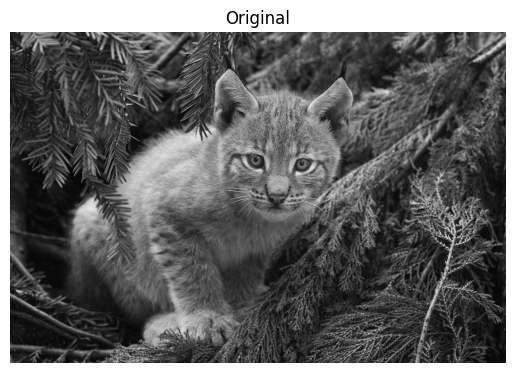

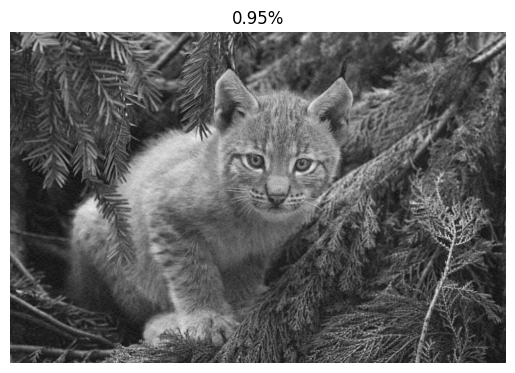

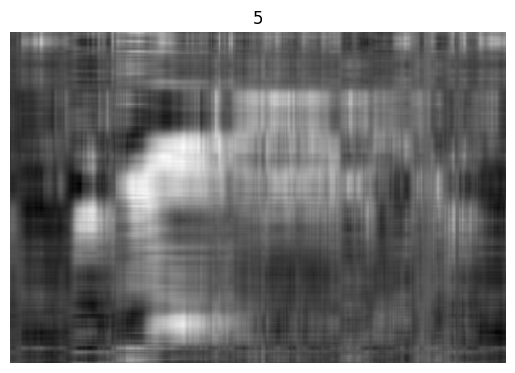

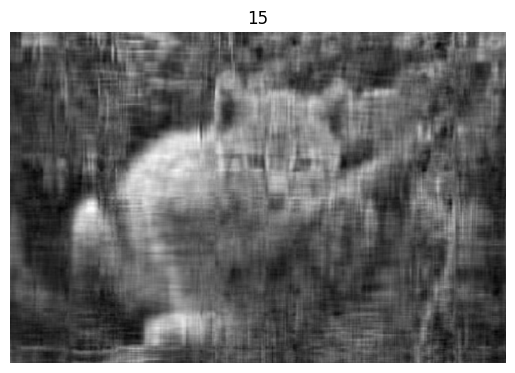

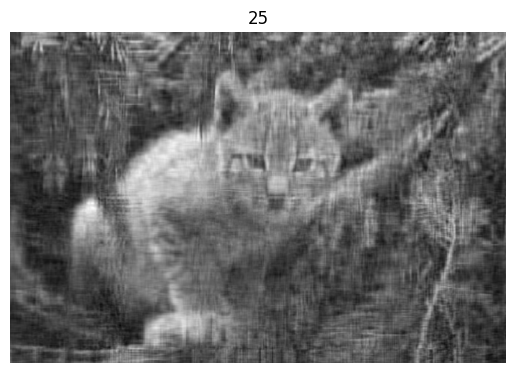

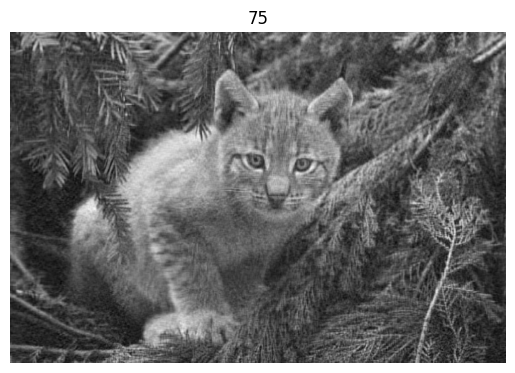

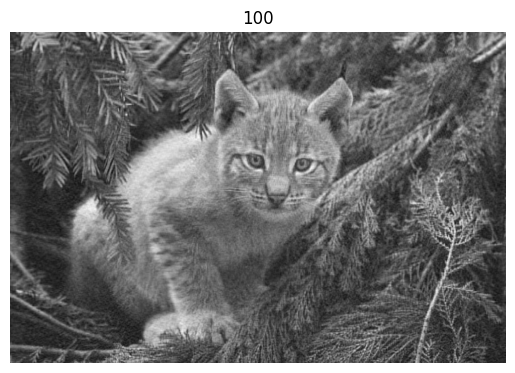

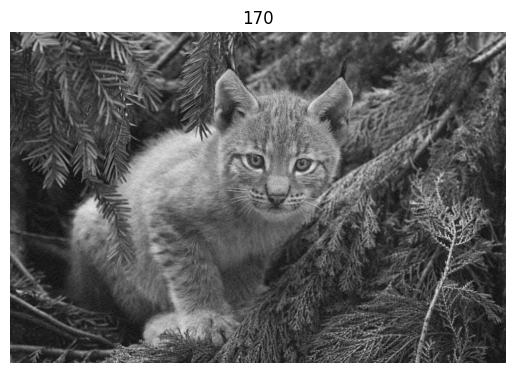

In [169]:
def reconstruct(top_k):
    top_vectors = eigenvectors[:, :top_k]
    projection = X @ top_vectors
    
    X_reconstructed = projection @ top_vectors.T
    img_reconstructed = X_reconstructed + np.mean(image_bw, axis=0)
    
    return img_reconstructed

show_image(image_bw, title="Original")
show_image(reconstruct(calc_k(0.95)), title="0.95%")
show_image(reconstruct(5), title="5")
show_image(reconstruct(15), title="15")
show_image(reconstruct(25), title="25")
show_image(reconstruct(75), title="75")
show_image(reconstruct(100), title="100")
show_image(reconstruct(170), title="170")

## Task 3

In [284]:
def encrypt_message(message, key_matrix):
    message_vector = np.array([ord(char) for char in message])
    encrypted_vector = key_matrix @ message_vector
    return np.real(encrypted_vector)

In [285]:
message = "Hello, World!"

In [286]:
key_matrix = np.random.randint(0, 256, (len(message), len(message)))

key_matrix

array([[ 95,  39, 208, 102,  80, 255,  34,  82, 205,  83, 144, 180,  88],
       [152, 160,  27,  27,  65, 169, 169, 205, 102,  54,  91, 126,   2],
       [220, 198, 169, 215, 254,  34,  71,  17, 110, 105,  18, 185, 165],
       [ 66,  19,  15, 202, 232,  20, 174, 223,  79,  16,  83,  43, 199],
       [127, 216, 147, 191, 242, 134, 193,  79, 100,  36,  69,  86,  88],
       [ 88, 147, 164, 200, 231,  75, 244, 125, 121, 177, 241,  87,  10],
       [ 42, 249, 141, 198,  52, 115, 115,  30, 121, 204, 103, 241,  21],
       [ 22,  44, 126, 105, 136,  75, 102, 117,  36, 189,   4,  63, 121],
       [142,  67, 141,  38,  93, 220,  73, 116, 192, 203,  44, 182,  43],
       [167,  51, 106, 116, 252, 120, 251,  41,  70,  60,   3,  45, 213],
       [ 74, 255, 180, 161,  20,  97, 246, 210, 131, 251, 209, 182,  28],
       [248,  17, 194, 112,  57, 187, 179,  27, 118,  57,  14, 127,   5],
       [ 64, 132, 109, 102, 194, 110, 238, 141, 241, 191,  78,   8,  84]],
      dtype=int32)

In [287]:
encrypted_message = encrypt_message(message, key_matrix)

encrypted_message

array([141254, 110802, 160820, 112132, 147431, 176786, 154511,  99082,
       137579, 112465, 185392, 109226, 147506])

In [288]:
def decrypt_message(message, key_matrix):
    decrypted_vector = np.linalg.inv(key_matrix) @ message
    decrypted_vector = np.rint(decrypted_vector).astype(int)
    return "".join([chr(int(x)) for x in decrypted_vector])

decrypt_message(encrypted_message, key_matrix)

'Hello, World!'